## Import required Libraries

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_log_error, mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector

## Import Data

In [14]:
df_train = pd.read_csv("train.csv")
df_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [15]:
df_train.shape

(456548, 9)

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [108]:
df_test = pd.read_csv("test.csv")
df_test.shape

(32573, 8)

In [5]:
df_meal = pd.read_csv("meal_info.csv")
df_meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [6]:
df_meal.shape

(51, 3)

In [7]:
df_meal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [11]:
df_center = pd.read_csv("fulfilment_center_info.csv")
df_center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [12]:
df_center.shape

(77, 5)

In [13]:
df_center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


### Merge all the dataframes

In [17]:
df = pd.merge(pd.merge(df_train, df_meal, on='meal_id'), df_center, on='center_id', how='left')
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1040403,1,24,1885,136.83,136.83,0,0,1498,Beverages,Thai,614,85,TYPE_B,3.6
2,1103215,1,11,1885,136.83,136.83,0,0,959,Beverages,Thai,679,56,TYPE_A,3.7
3,1034383,1,83,1885,121.31,120.31,0,1,1025,Beverages,Thai,659,77,TYPE_A,5.3
4,1118999,1,32,1885,114.52,113.52,0,1,445,Beverages,Thai,526,34,TYPE_A,3.8


In [18]:
df.shape

(456548, 15)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [20]:
df.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [109]:
test = pd.merge(pd.merge(df_test, df_meal, on='meal_id'), df_center, on='center_id', how='left')
test.shape

(32573, 14)

### Identify the variables as Numerical and Categorical

In [27]:
pd.options.display.float_format = '{:.4f}'.format
df.id.describe()

count    456548.0000
mean    1250096.3056
std      144354.8224
min     1000000.0000
25%     1124998.7500
50%     1250183.5000
75%     1375140.2500
max     1499999.0000
Name: id, dtype: float64

In [29]:
# Id variable does not have continuous values, the data has been picked from a larger dataset.

In [28]:
pd.options.display.float_format = None

In [30]:
df1 = df.drop("id", axis=1)

In [110]:
test1 = test.drop("id", axis=1)
test1.shape

(32573, 13)

In [31]:
df1.columns

Index(['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area'],
      dtype='object')

In [33]:
df_num = df1.loc[:, ["checkout_price", 'base_price', 'op_area', 'num_orders']]
df_num.head()

,checkout_price,base_price,op_area,num_orders
0,136.83,152.29,2.0,177
1,136.83,136.83,3.6,1498
2,136.83,136.83,3.7,959
3,121.31,120.31,5.3,1025
4,114.52,113.52,3.8,445


In [111]:
test_num = test1.loc[:, ["checkout_price", 'base_price', 'op_area']]
test_num.shape

(32573, 3)

In [39]:
df_num.columns

Index(['checkout_price', 'base_price', 'op_area', 'num_orders'], dtype='object')

In [40]:
df_cat = df1.loc[:, ['week', 'center_id', 'meal_id',
       'emailer_for_promotion', 'homepage_featured', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type']]
df_cat.head()

,week,center_id,meal_id,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type
0,1,55,1885,0,0,Beverages,Thai,647,56,TYPE_C
1,1,24,1885,0,0,Beverages,Thai,614,85,TYPE_B
2,1,11,1885,0,0,Beverages,Thai,679,56,TYPE_A
3,1,83,1885,0,1,Beverages,Thai,659,77,TYPE_A
4,1,32,1885,0,1,Beverages,Thai,526,34,TYPE_A


In [46]:
df_cat.shape

(456548, 10)

In [112]:
test_cat = test1.loc[:, ['week', 'center_id', 'meal_id',
       'emailer_for_promotion', 'homepage_featured', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type']]

In [42]:
df1.week.nunique()

145

### Univariate Analysis

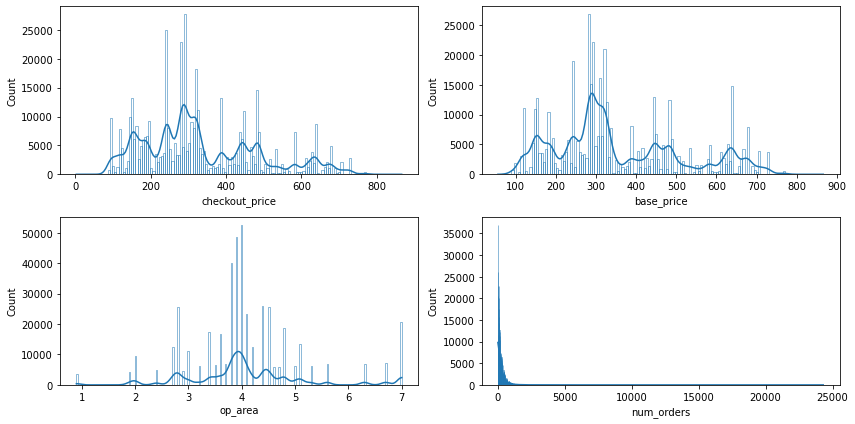

In [45]:
plt.figure(figsize=[12,6])
i = 1
for x in df_num:
    plt.subplot(2, 2, i)
    sns.histplot(df_num[x], kde=True, fill=False)
    i += 1
    
plt.tight_layout()
plt.show()

In [50]:
# Checkout and Base price seem to follow similar distribution of data
# Operation Area seems to have normal and stretched out data.

<AxesSubplot:xlabel='num_orders', ylabel='Count'>

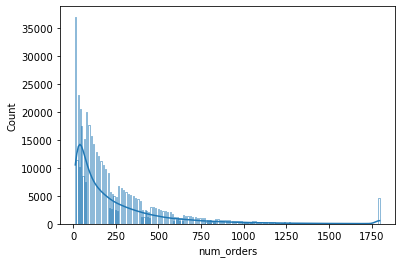

In [52]:
up = np.quantile(df_num['num_orders'], 0.99)

x = df_num['num_orders'].clip(upper=up)
sns.histplot(x, kde=True, fill=False)

In [53]:
# Number of orders is a highly right skewed data due to a few observations
# Num orders frequency shows a constant decline with increase in number

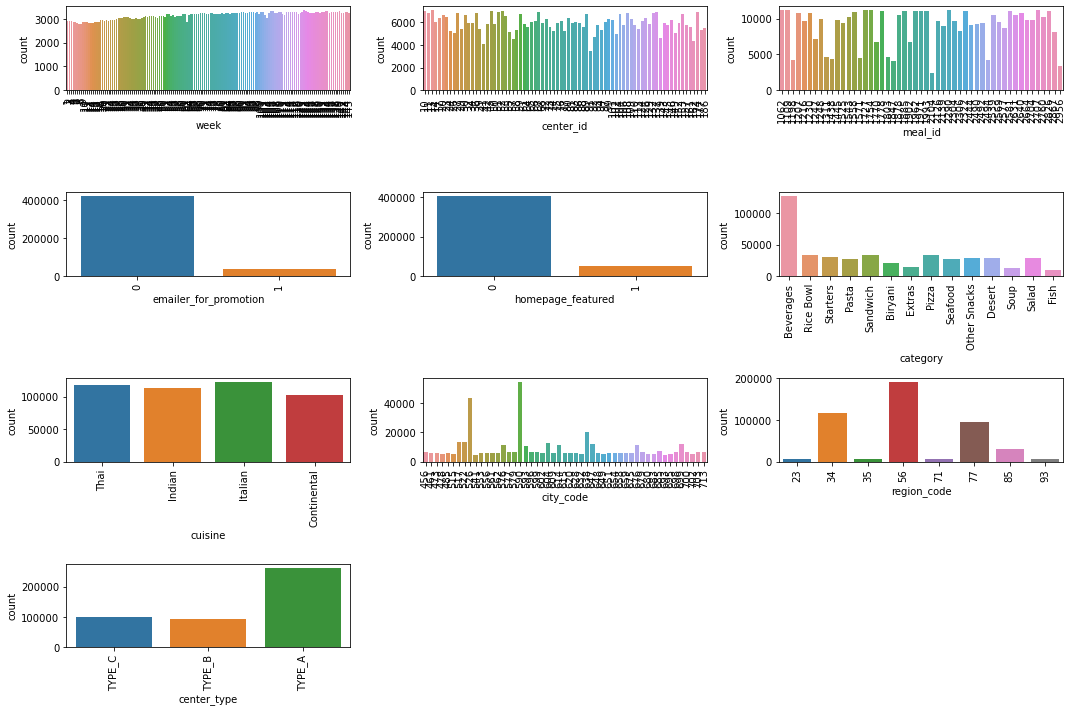

In [49]:
plt.figure(figsize=[15,10])
c = 1
for x in df_cat:
    plt.subplot(4, 3, c)
    sns.countplot(data=df_cat, x=x)
    plt.xticks(rotation='vertical')
    c += 1

plt.tight_layout()
plt.show()

In [56]:
df_cat.city_code.value_counts().sort_values(ascending=False).head()

590    54746
526    43525
638    20047
522    13459
517    13109
Name: city_code, dtype: int64

In [57]:
# Week- There is a uniform distribution throught out the timeframe, and there is a slight increase in customers.
# Email for promotion- The fulfilment center has not sent out much mail for promotion.
# Homepage featured- The products that are being sold more are not featured on the homepage.
# Category- We can see that beverages are being sold the most.
# Cuisine- The orders are evenly distributed in all of the cuisine.
# City_code- Cities with city code 590 and 526 are cities where majority of our orders come from.
# Regions 34, 56 and 77 are bringing in the most business
# Type A center is dominating the data.

### Bivariate Analysis

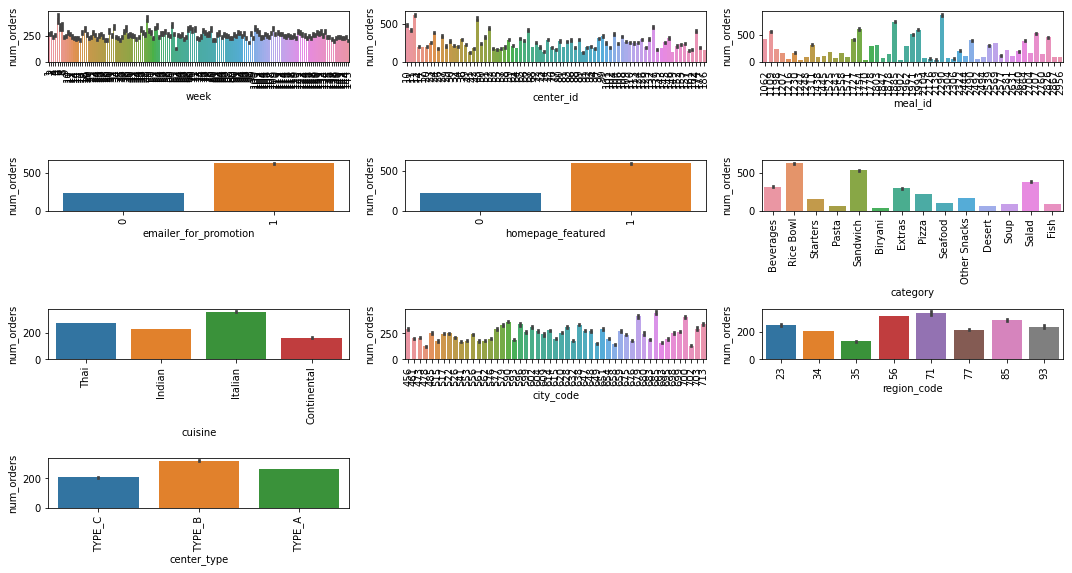

In [60]:
plt.figure(figsize=[15,8])
j=1
for i in df_cat.columns:
        plt.subplot(4, 3,j)
        sns.barplot(data=df_cat, x=i, y=df_num.num_orders)
        j+=1
        plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [62]:
# Email contacted customers are bringing higher number of orders
# Homepage Featured Meals are bringing higher number of orders
# Rice bowl, Sandwich and Salad are being sold in higher quantities
# Higher numbers are being ordered from region_code 56, 71
# Customers prefer Italian the most
# Type B centres are bringing most number of orders.

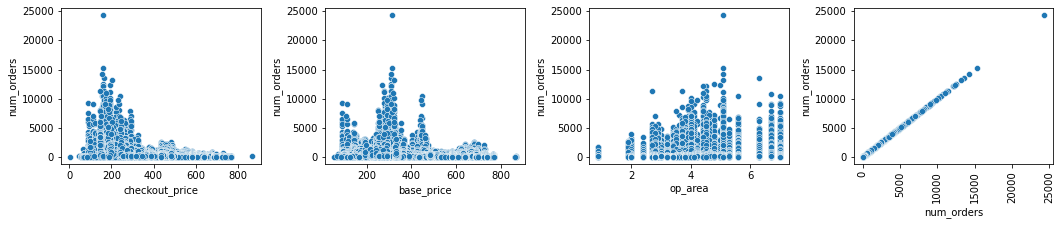

In [61]:
plt.figure(figsize=[15,8])
j=1
for i in df_num.columns:
        plt.subplot(3,4,j)
        sns.scatterplot(data=df_num, x=i, y=df_num.num_orders)
        j+=1
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [63]:
# Most orders are of around 200 bucks Checkout Price
# Most orders are of around 100, 300, 500 bucks Base Price

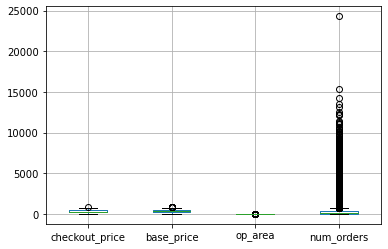

In [64]:
df_num.boxplot()
plt.show()

In [69]:
# There are a lot of outliers in num_orders

<AxesSubplot:>

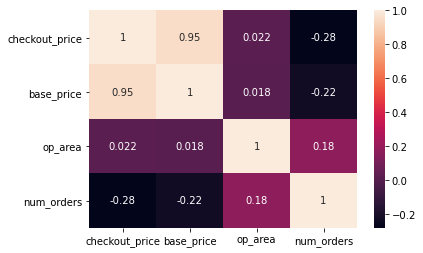

In [65]:
sns.heatmap(df_num.corr(), annot=True)

In [67]:
vif = []

for i in range(df_num.shape[1]):
    vif.append(variance_inflation_factor(df_num.values, i))
    
pd.DataFrame({"Feature":df_num.columns, "VIF":vif}).sort_values(by='VIF', ascending=False)

,Feature,VIF
0,checkout_price,66.520170
1,base_price,65.684163
2,op_area,5.901204
3,num_orders,1.639955


In [68]:
# Checkout and Base price are highly multicollinear
# So, if any model assumes no multicollinearity, we can drop either one of these

### Feature Encoding

In [71]:
df_cat.head()

,week,center_id,meal_id,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type
0,1,55,1885,0,0,Beverages,Thai,647,56,TYPE_C
1,1,24,1885,0,0,Beverages,Thai,614,85,TYPE_B
2,1,11,1885,0,0,Beverages,Thai,679,56,TYPE_A
3,1,83,1885,0,1,Beverages,Thai,659,77,TYPE_A
4,1,32,1885,0,1,Beverages,Thai,526,34,TYPE_A


In [73]:
df_cat.center_id.value_counts()

13     7046
10     7015
52     6993
43     6970
67     6915
       ... 
139    4627
57     4501
162    4366
41     4083
91     3432
Name: center_id, Length: 77, dtype: int64

In [74]:
df_cat.meal_id.value_counts()

2290    11138
1062    11137
1727    11136
1109    11134
1754    11132
2707    11123
1778    11121
1993    11116
1962    11114
1971    11102
1885    11092
2581    11072
2826    11057
2322    11002
1558    10952
1207    10806
2640    10747
1230    10746
1878    10527
2631    10458
2539    10451
1543    10236
2760    10209
1248     9939
2664     9853
2704     9811
1445     9727
2126     9705
1216     9695
2304     9676
2569     9459
2492     9382
1525     9359
2490     9247
2444     9097
2139     8899
2577     8667
2306     8294
2867     8092
1247     7184
1902     6748
1770     6682
1311     4682
1803     4674
1571     4511
1438     4385
1198     4206
2494     4206
1847     4084
2956     3319
2104     2357
Name: meal_id, dtype: int64

In [75]:
df_cat.city_code.value_counts()

590    54746
526    43525
638    20047
522    13459
517    13109
604    13062
699    12098
647    11833
576    11456
614    11332
676    11177
593    10804
685     6993
700     6891
713     6853
579     6843
679     6801
456     6716
703     6706
698     6434
577     6389
599     6296
596     6293
648     6090
602     6057
659     6053
654     6041
628     5983
651     5975
562     5938
615     5892
556     5885
473     5855
561     5846
461     5763
620     5732
609     5721
675     5715
485     5712
658     5591
553     5547
649     5528
680     5379
695     5296
683     5296
632     5292
702     5264
515     5085
478     5021
693     4627
541     4501
Name: city_code, dtype: int64

In [77]:
df_cat.region_code.value_counts()

56    191228
34    116713
77     94612
85     30283
23      6434
71      6293
93      5721
35      5264
Name: region_code, dtype: int64

In [79]:
df_dummy = pd.get_dummies(df_cat, drop_first=True)
df_dummy.head()

,week,center_id,meal_id,emailer_for_promotion,homepage_featured,city_code,region_code,category_Biryani,category_Desert,category_Extras,...,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C
0,1,55,1885,0,0,647,56,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1,24,1885,0,0,614,85,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,1,11,1885,0,0,679,56,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,83,1885,0,1,659,77,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,32,1885,0,1,526,34,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [113]:
test_dummy = pd.get_dummies(test_cat, drop_first=True)

In [81]:
df_final = pd.concat([df_num, df_dummy], axis=1)
df_final.head()

,checkout_price,base_price,op_area,num_orders,week,center_id,meal_id,emailer_for_promotion,homepage_featured,city_code,...,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C
0,136.83,152.29,2.0,177,1,55,1885,0,0,647,...,0,0,0,0,0,0,0,1,0,1
1,136.83,136.83,3.6,1498,1,24,1885,0,0,614,...,0,0,0,0,0,0,0,1,1,0
2,136.83,136.83,3.7,959,1,11,1885,0,0,679,...,0,0,0,0,0,0,0,1,0,0
3,121.31,120.31,5.3,1025,1,83,1885,0,1,659,...,0,0,0,0,0,0,0,1,0,0
4,114.52,113.52,3.8,445,1,32,1885,0,1,526,...,0,0,0,0,0,0,0,1,0,0


In [114]:
test_final = pd.concat([test_num, test_dummy], axis=1)

In [86]:
X = df_final.drop("num_orders", axis=1)
y = df_final['num_orders']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
print("Train Score:", lr.score(xtrain, ytrain))
print("Test Score:", lr.score(xtest, ytest))

Train Score: 0.41342443031301945
Test Score: 0.40035991919170066


In [91]:
dtree = DecisionTreeRegressor()
dtree.fit(xtrain, ytrain)
print("Train Score:", dtree.score(xtrain, ytrain))
print("Test Score:", dtree.score(xtest, ytest))

Train Score: 1.0
Test Score: 0.7582168628852738


In [95]:
ypred_dtree = dtree.predict(xtest)

In [96]:
np.sqrt(mean_squared_log_error(ytest, ypred_dtree))

0.6383360024702392

In [ ]:
np.sqrt(mean_squared_log_error())

In [92]:
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)
print("Train Score:", rf.score(xtrain, ytrain))
print("Test Score:", rf.score(xtest, ytest))

Train Score: 0.9803273526563637
Test Score: 0.8635643385198344


In [93]:
ypred_rf = rf.predict(xtest)

In [94]:
np.sqrt(mean_squared_log_error(ytest, ypred_rf))

0.4888137511705738

In [115]:
ypred_test_rf = rf.predict(test_final)

In [123]:
test_pred = pd.concat([df_test['id'], pd.Series(ypred_test_rf)], axis=1)
test_pred.head()

,id,0
0,1028232,96.24
1,1127204,1553.73
2,1212707,1458.81
3,1082698,809.00
4,1400926,327.58


In [129]:
test_pred.to_csv("pred_rf", index=None)

In [131]:
sfs = SequentialFeatureSelector(estimator=RandomForestRegressor(), k_features='best', cv=5, scoring='neg_mean_squared_error')
sfs.fit(xtrain, ytrain)
sfs.k_feature_names_


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

('week', 'meal_id')